In [1]:
from importlib import reload
import sys, os
import re
from pathlib import Path
import pickle

import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype, is_datetime64_dtype, is_timedelta64_dtype
from scipy import stats
import datetime
import time
from natsort import natsorted, ns, natsort_keygen
from packaging import version

import copy
import itertools
import adjustText

import pyodbc
#---------------------------------------------------------------------
sys.path.insert(0, os.path.realpath('..'))
import Utilities_config
#-----
import CommonLearningMethods as clm
#-----
from MeterPremise import MeterPremise
#-----
from AMI_SQL import AMI_SQL
from AMINonVee_SQL import AMINonVee_SQL
from AMIEndEvents_SQL import AMIEndEvents_SQL
from AMIUsgInst_SQL import AMIUsgInst_SQL
from DOVSOutages_SQL import DOVSOutages_SQL
#-----
from GenAn import GenAn
from AMINonVee import AMINonVee
from AMIEndEvents import AMIEndEvents
from AMIUsgInst import AMIUsgInst
from DOVSOutages import DOVSOutages
from DOVSAudit import DOVSAudit
#---------------------------------------------------------------------
sys.path.insert(0, Utilities_config.get_sql_aids_dir())
import Utilities_sql
import TableInfos
from TableInfos import TableInfo
from SQLElement import SQLElement
from SQLElementsCollection import SQLElementsCollection
from SQLSelect import SQLSelectElement, SQLSelect
from SQLFrom import SQLFrom
from SQLWhere import SQLWhereElement, SQLWhere
from SQLJoin import SQLJoin, SQLJoinCollection
from SQLGroupBy import SQLGroupByElement, SQLGroupBy
from SQLHaving import SQLHaving
from SQLOrderBy import SQLOrderByElement, SQLOrderBy
from SQLQuery import SQLQuery
from SQLQueryGeneric import SQLQueryGeneric
#---------------------------------------------------------------------
sys.path.insert(0, Utilities_config.get_utilities_dir())
import Utilities
import Utilities_df
from Utilities_df import DFConstructType
import Utilities_dt
import Plot_General
import Plot_Box_sns
import Plot_Hist
import GrubbsTest
import DataFrameSubsetSlicer
from DataFrameSubsetSlicer import DataFrameSubsetSlicer as DFSlicer
from DataFrameSubsetSlicer import DataFrameSubsetSingleSlicer as DFSingleSlicer
#---------------------------------------------------------------------
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker
from matplotlib import dates
import matplotlib.colors as mcolors
import matplotlib.cm as cm #e.g. for cmap=cm.jet

In [2]:
# outg_rec_nb = '13739245'
outg_rec_nb = '13827643'

In [3]:
#--------------------------------------------------
calculate_by_PN = True
#-------------------------
# combine_by_PN_likeness_thresh = pd.Timedelta('1 minutes')
combine_by_PN_likeness_thresh = pd.Timedelta('15 minutes')
#-------------------------
expand_outg_search_time_tight = pd.Timedelta('1 hours')
expand_outg_search_time_loose = pd.Timedelta('12 hours')
#-------------------------
use_est_outg_times=False
# use_est_outg_times=True
#-------------------------
use_full_ede_outgs=False
#-------------------------
run_outg_inclusion_assessment=True
#-------------------------
max_pct_PNs_missing_allowed=0
# max_pct_PNs_missing_allowed=20

#--------------------------------------------------
include_suboutg_endpt_plots=True
#-------------------------
n_PNs_w_power_threshold = 95

In [4]:
audit_i = DOVSAudit(
    outg_rec_nb                   = outg_rec_nb, 
    calculate_by_PN               = calculate_by_PN, 
    combine_by_PN_likeness_thresh = combine_by_PN_likeness_thresh, 
    expand_outg_search_time_tight = expand_outg_search_time_tight, 
    expand_outg_search_time_loose = expand_outg_search_time_loose, 
    use_est_outg_times            = use_est_outg_times, 
    use_full_ede_outgs            = use_full_ede_outgs, 
    run_outg_inclusion_assessment = run_outg_inclusion_assessment, 
    max_pct_PNs_missing_allowed   = max_pct_PNs_missing_allowed, 
)

In [5]:
#-------------------------
audit_i.load_dovs(
    dovs_df           = None, 
    dovs_df_info_dict = None
)

C:\Users\s346557\Documents\Analysis\GenAn.py:656: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)
C:\Users\s346557\Documents\Analysis\GenAn.py:656: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


# Either run build_mp_df and run_ami_and_ede_daq, OR load_ami_from_csvs and load_ede_from_csvs

In [6]:
search_time_half_window=pd.Timedelta('24 hours')
#-------------------------
audit_i.build_mp_df(
    drop_mp_dups_fuzziness=pd.Timedelta('1 hour')
)
#-------------------------
audit_i.run_ami_and_ede_daq(
    search_time_half_window=search_time_half_window
)

n_coll = 17
batch_size = 10000
n_batches = 1


C:\Users\s346557\Documents\Analysis\GenAn.py:656: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


n_coll = 17
batch_size = 10000
n_batches = 1


C:\Users\s346557\Documents\Analysis\GenAn.py:656: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


n_coll = 17
batch_size = 1000
n_batches = 1


C:\Users\s346557\Documents\Analysis\GenAn.py:656: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


n_coll = 17
batch_size = 1000
n_batches = 1


C:\Users\s346557\Documents\Analysis\GenAn.py:656: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


# Either run build_mp_df and run_ami_and_ede_daq, OR load_ede_from_csvs

In [7]:
fig_num=0

### First check: If no AMI data, cannot continue

In [8]:
if audit_i.ami_df_i.shape[0]==0:
    print("ami_df_i.shape[0]==0!!!!!")
    assert(0)

### Second check: Inclusion
If run_outg_inclusion_assessment is True and to_include_i is False, stop running

In [9]:
if run_outg_inclusion_assessment:
    to_include_i = audit_i.self_assess_outage_inclusion_requirements(max_pct_PNs_missing_allowed, None)
    if not to_include_i:
        print(f'outg_rec_nb={outg_rec_nb} did not pass inclusion requirements, skipping!!!!!')
        outgs_fail.append((outg_rec_nb, "Inclusion Requirements"))
        assert(0)

In [10]:
audit_i.build_best_ests_df()
audit_i.identify_overlaps_and_resolve(
    overlaps_dovs_sql_fcn = DOVSOutages_SQL.build_sql_outage
)
audit_i.finalize_analysis()

col_1=dovs_min in df_1 is object type, but not string or list
NOT SURE HOW TO HANDLE!!!!!


C:\Users\s346557\Documents\Analysis\Utilities\Utilities_df.py:1324: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return_df = pd.concat(


n_coll = 17
batch_size = 1000
n_batches = 1


C:\Users\s346557\Documents\Analysis\GenAn.py:656: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


		Impossible for outage overlaps procedure to proceed!!!!!
		Impossible for outage overlaps procedure to proceed!!!!!
		Exiting DOVSAudit.identify_overlaps_and_resolve


In [16]:
audit_i.dovs_outg_t_beg_end

[Timestamp('2024-03-26 21:20:00'), Timestamp('2024-03-27 00:09:00')]

In [19]:
audit_i.overlap_outgs_for_PNs_df[audit_i.overlap_outgs_for_PNs_df['lost_power']==True]['overlap_outg_rec_nbs'].apply(lambda x: len(x)>0)

OUTG_REC_NB  PREMISE_NB
13827643     040784981     False
             041384981     False
             041535981     False
             043725981     False
             043815114     False
             043884981     False
             044484981     False
             045235981     False
             046825981     False
             046984981     False
             047584981     False
             047629851     False
             048178981      True
             048335981     False
             049094981     False
             049418637     False
             049925981     False
Name: overlap_outg_rec_nbs, dtype: bool

In [11]:
#----------------------------------------------------------------------------------------------------
# ######################### PLOTTING #########################
#----------------------------------------------------------------------------------------------------

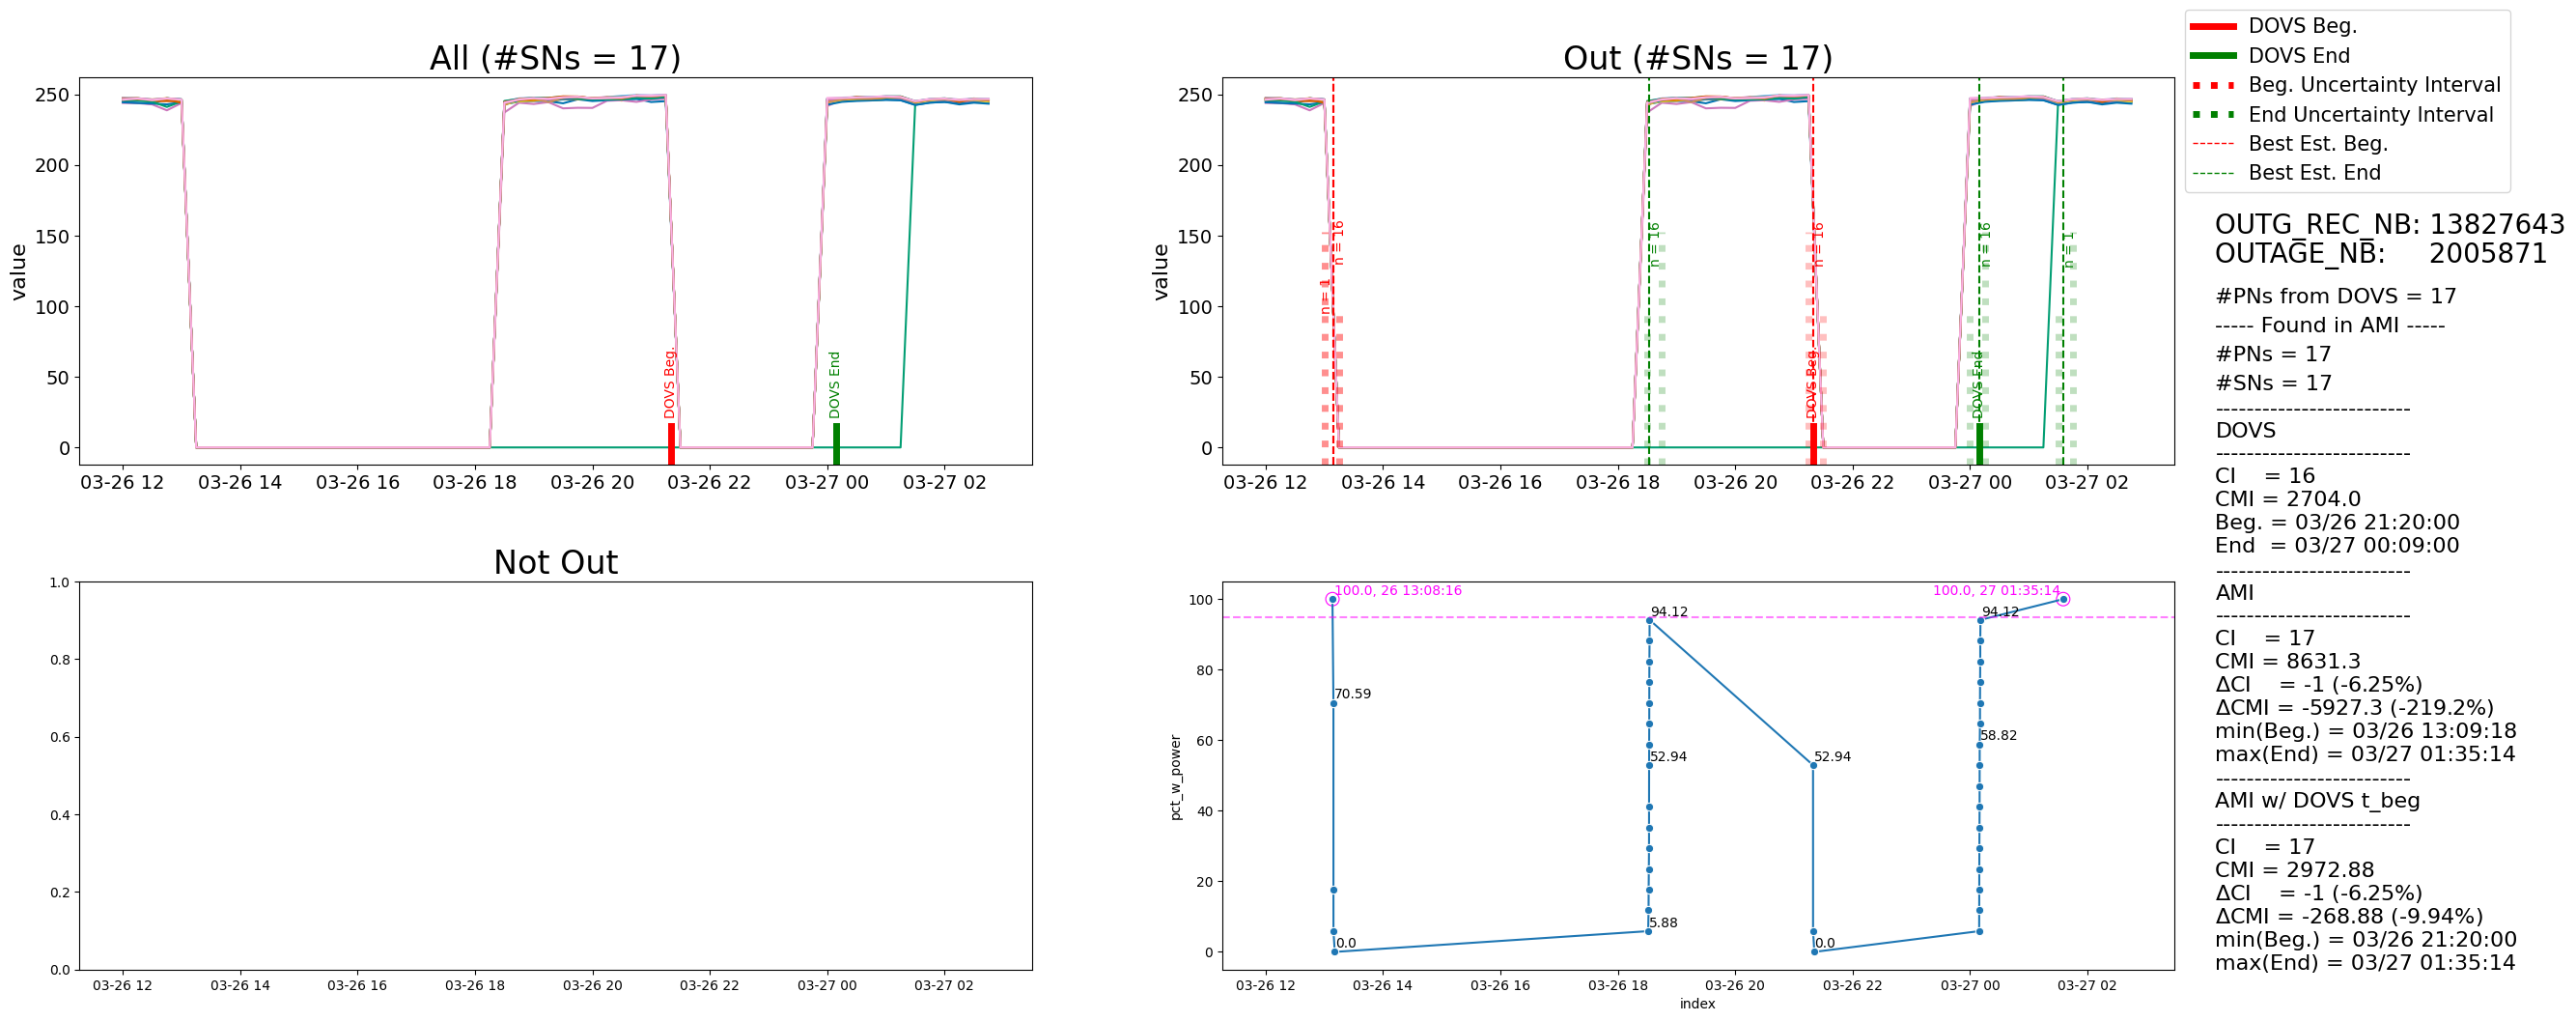

In [12]:
fig,axs = audit_i.plot_results(True)

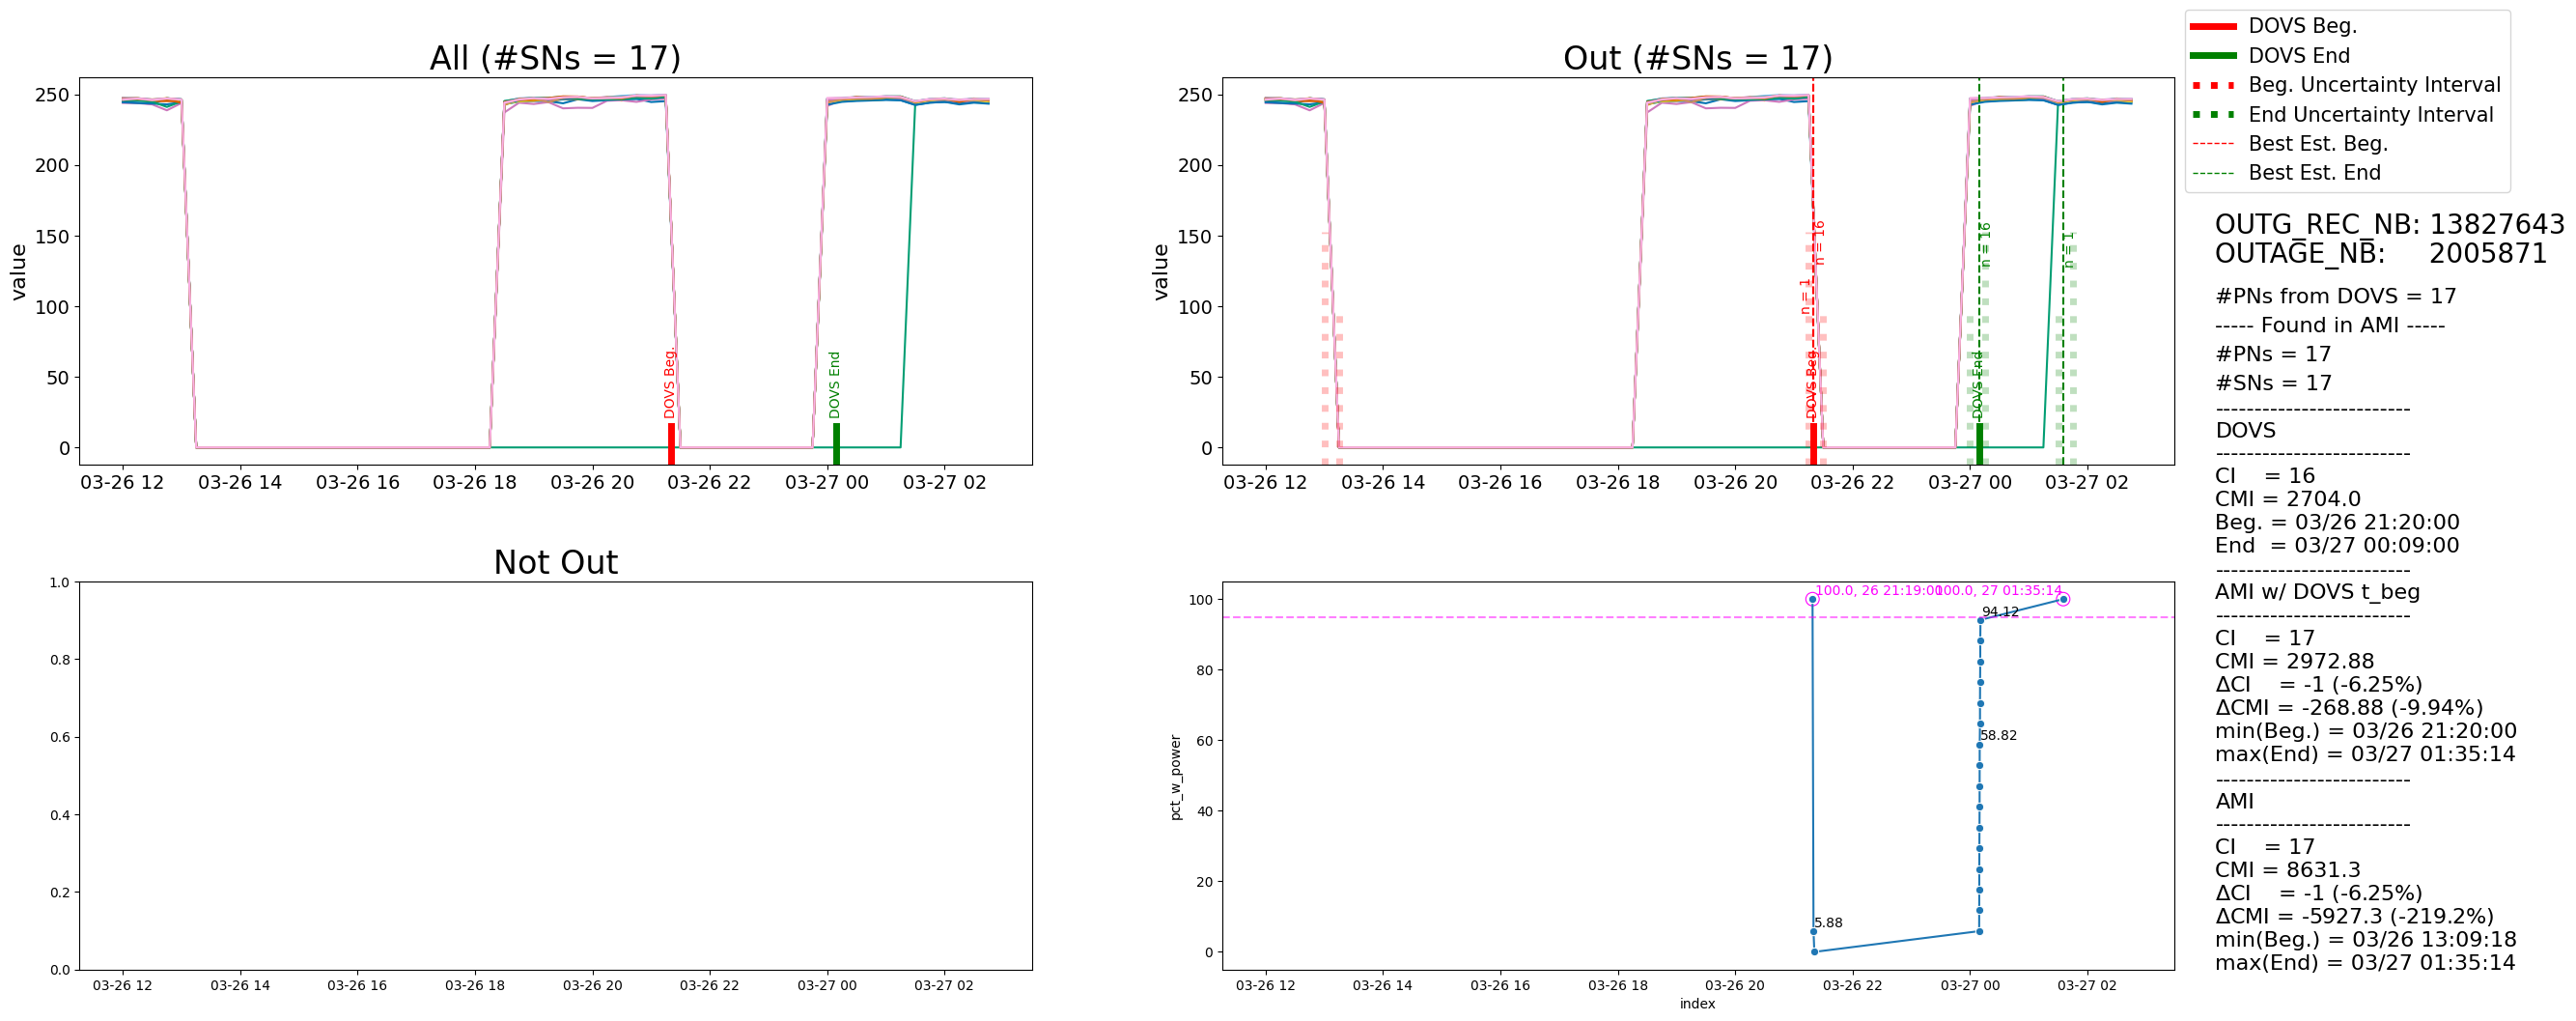

In [13]:
fig,axs = audit_i.plot_results_dovs_beg(True)

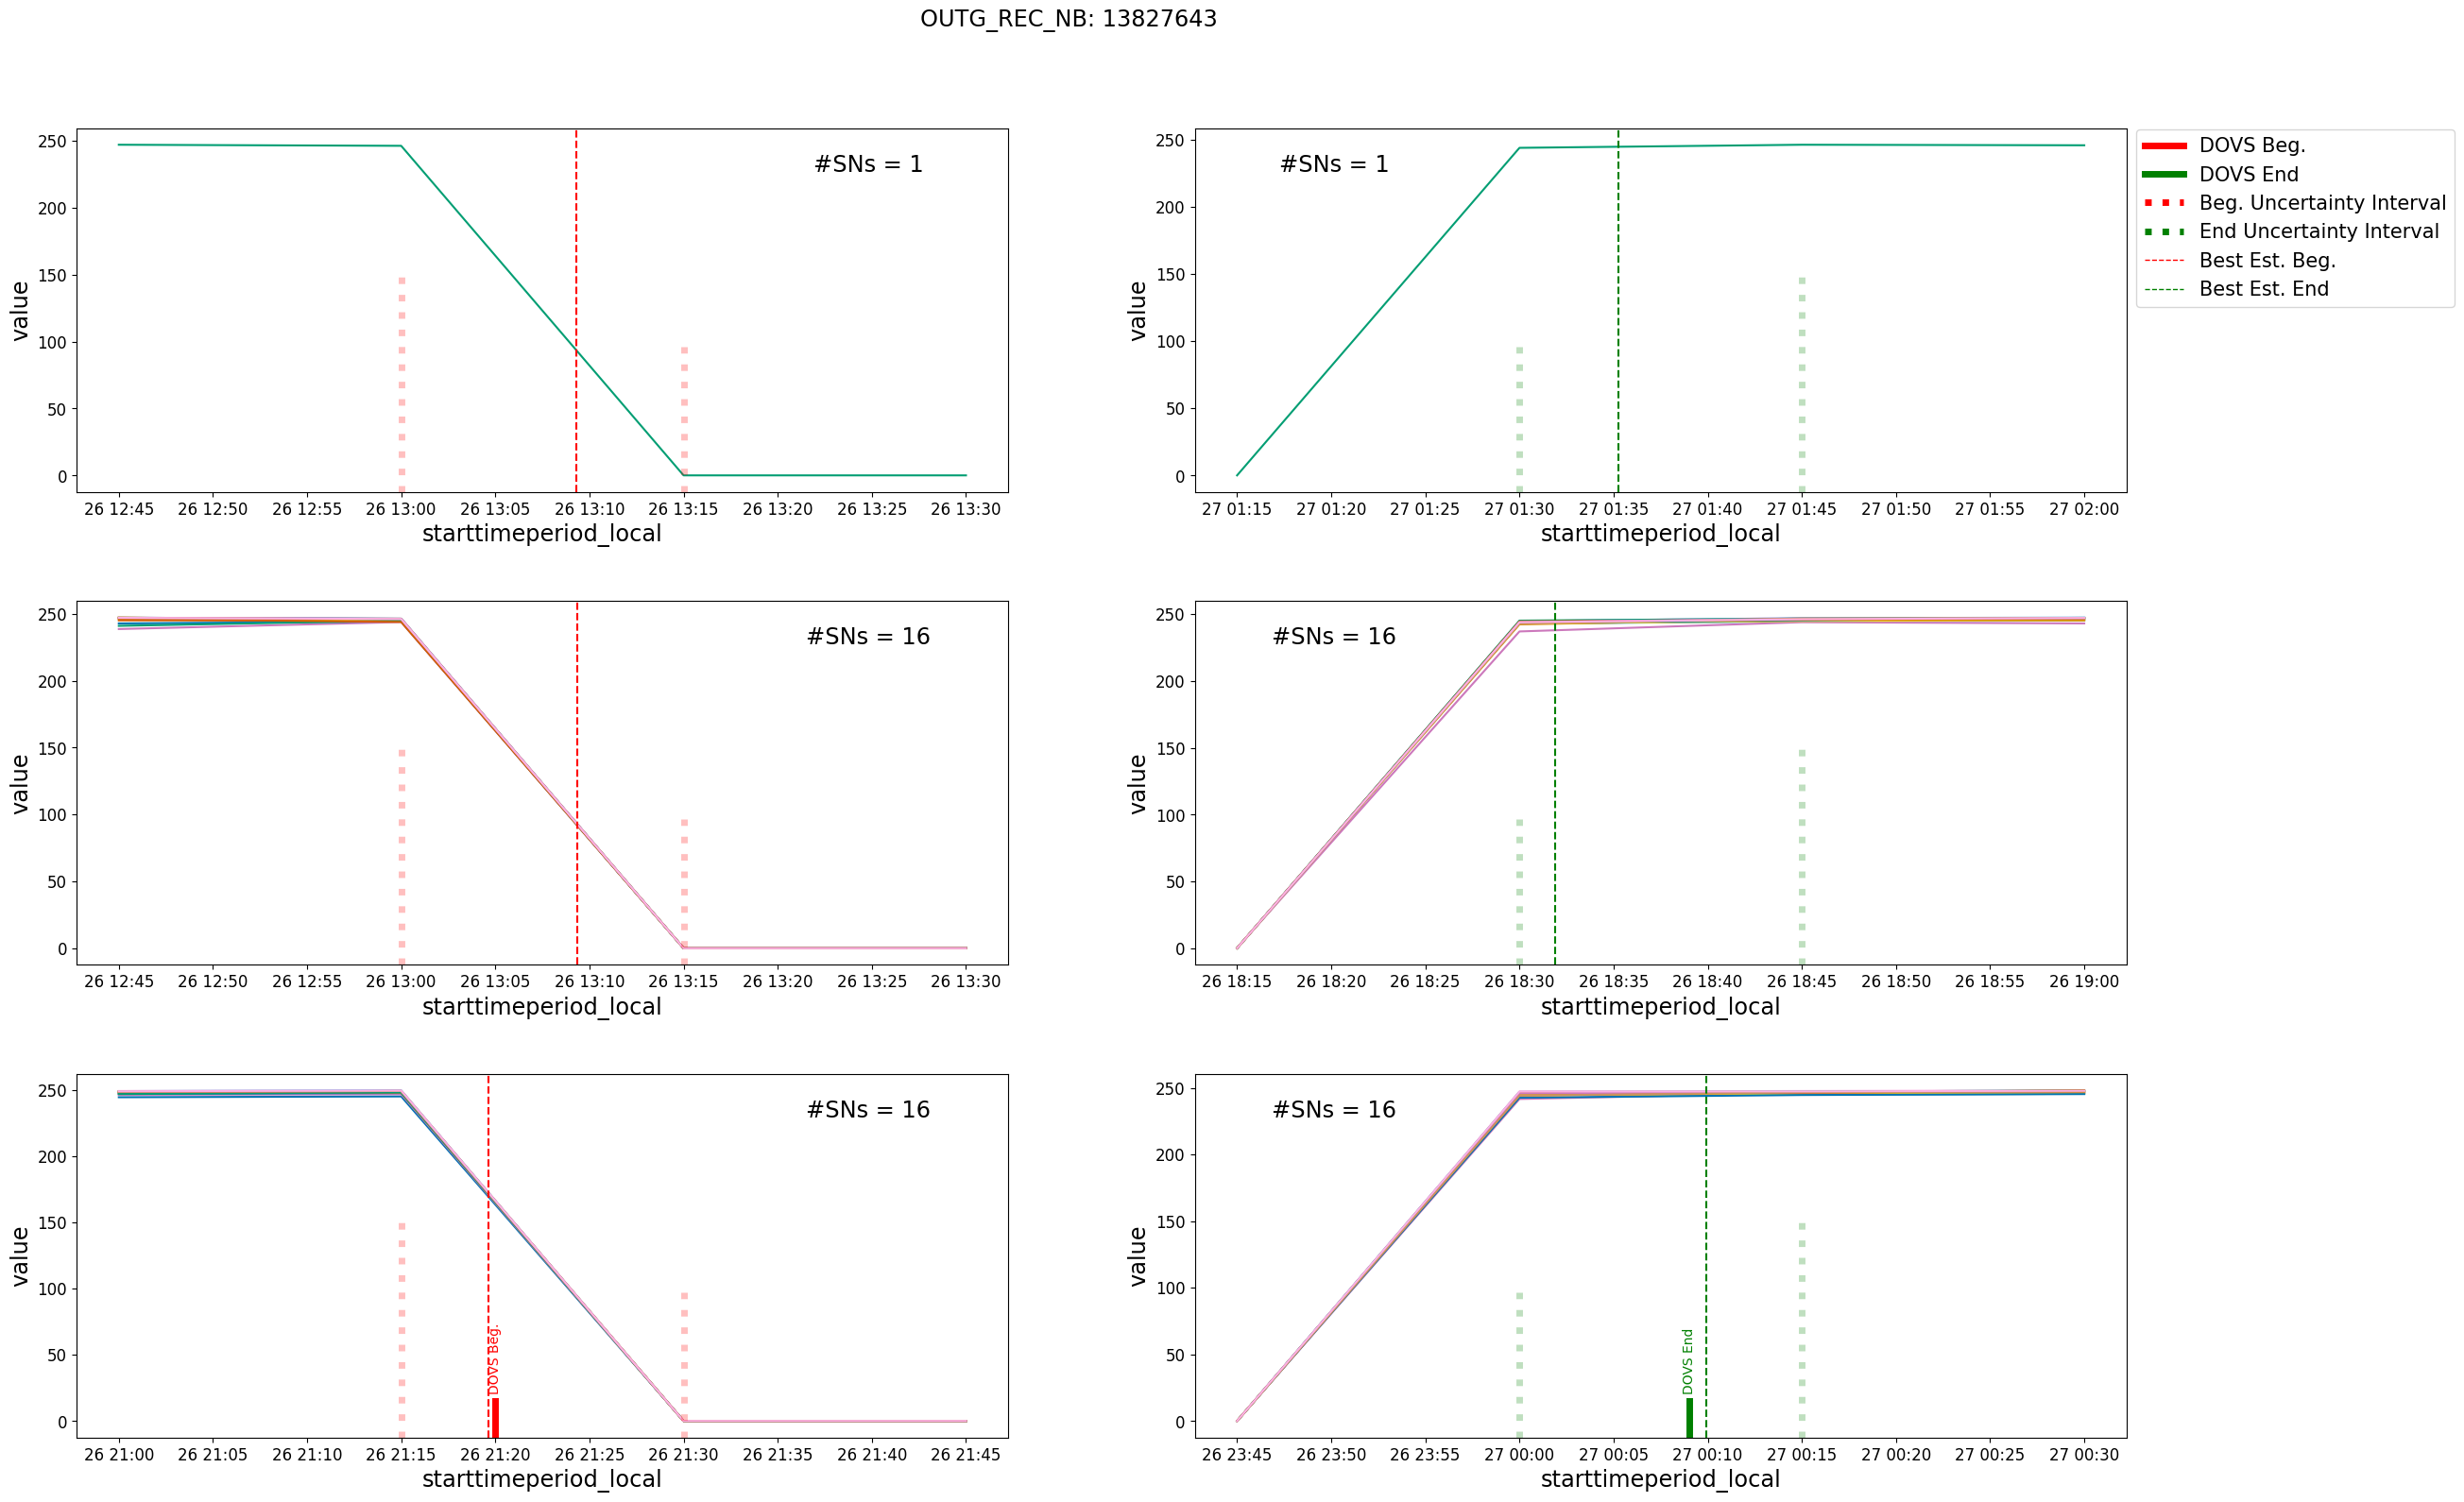

In [14]:
if include_suboutg_endpt_plots:
    fig,axs = audit_i.plot_zoomed_endpts()

In [15]:
assert(0)

AssertionError: 

# ===========================================================